In [2]:
# 1. CSV DATA SOURCE - California Housing Dataset
# Fetch the California housing dataset from scikit-learn and save it as a CSV file

from sklearn.datasets import fetch_california_housing
import pandas as pd

# Fetch the California housing dataset as a pandas DataFrame
data = fetch_california_housing(as_frame=True)
df = data.frame

# Save the dataset to a CSV file in the data/raw directory
df.to_csv("../data/raw/california.csv", index=False)

# Display the first 5 rows of the dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# 2. API DATA SOURCE - Toronto Open Data API
# Fetch data from the Toronto Open Data API and convert it to a pandas DataFrame

import requests
import pandas as pd

# Define the API endpoint URL for Toronto Open Data package list
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_list"

# Make a GET request to the API
response = requests.get(url)

# Parse the JSON response
data = response.json()

# Convert the API result to a pandas DataFrame
df_api = pd.DataFrame(data["result"])

# Display the first 5 rows of the API data
df_api.head()

,0
0,10-year-cycling-network-plan-on-street-2016
1,10-year-cycling-network-plan-trails-2016
2,2013-street-needs-assessment-results
3,2018-street-needs-assessment-results
4,2021-street-needs-assessment-results


In [4]:
# 3. DATABASE DATA SOURCE - SQLite Database
# Read CSV data and store it in a SQLite database, then query it back

import sqlite3
import pandas as pd

# Read the California housing CSV file
df = pd.read_csv("../data/raw/california.csv")

# Connect to (or create) a SQLite database file
conn = sqlite3.connect("../data/raw/housing.db")

# Store the DataFrame in the database as a table named "housing"
# if_exists="replace" will overwrite the table if it already exists
df.to_sql("housing", conn, if_exists="replace", index=False)

# Query the database to retrieve the first 5 rows
df_db = pd.read_sql("SELECT * FROM housing LIMIT 5", conn)

# Display the queried data
df_db

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# 4. SIMPLE EDA (Exploratory Data Analysis)
# Perform basic exploratory data analysis on the California housing dataset

# Read the dataset (if not already loaded)
df = pd.read_csv("../data/raw/california.csv")

# Display statistical summary of the dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


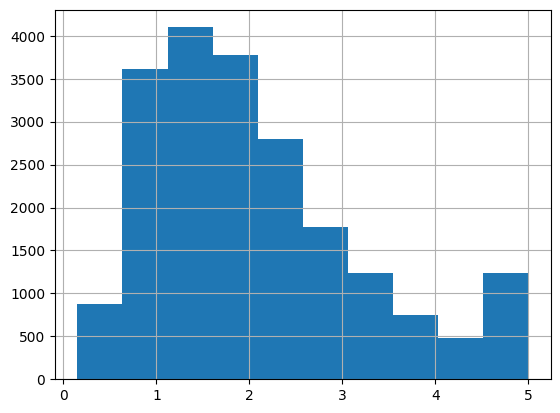

In [6]:
# Create a histogram of the median house values
import matplotlib.pyplot as plt

df["MedHouseVal"].hist()
plt.show()

In [9]:
# STEP 4 — LINEAR REGRESSION (Session 1)
# Simple linear regression using ONE feature (MedInc) to predict the target (MedHouseVal)
# Input (X): MedInc - Median income in block group
# Output (y): MedHouseVal - Median house value for California districts

import pandas as pd

# Load the California housing dataset
df = pd.read_csv("../data/raw/california.csv")

# Prepare the input feature (X) - using only MedInc column
# Using double brackets to keep it as a DataFrame (required for sklearn)
X = df[["MedInc"]]

# Prepare the target variable (y) - MedHouseVal column
y = df["MedHouseVal"]

In [10]:
# Train-test split
# Split the data into training and testing sets to evaluate model performance
# test_size=0.2 means 20% of data will be used for testing, 80% for training

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# X_train, y_train: features and targets for training (80% of data)
# X_test, y_test: features and targets for testing (20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Model training with sklearn
# Create and train a Linear Regression model on the training data

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
# The model learns the relationship between MedInc (X_train) and MedHouseVal (y_train)
model.fit(X_train, y_train)

# Make predictions on the test set
# pred contains the predicted house values for the test features
pred = model.predict(X_test)

In [14]:
# Model Evaluation
# Evaluate the model's performance using common regression metrics

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE (Root Mean Squared Error)
# RMSE measures the average magnitude of prediction errors
# Lower RMSE indicates better model performance (same units as target variable)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# Calculate R² (R-squared) score
# R² measures how well the model explains the variance in the target variable
# R² ranges from 0 to 1, where 1 means perfect predictions
r2 = r2_score(y_test, pred)

# Display both metrics
rmse, r2

(np.float64(0.8429812303882875), 0.47522056351281394)

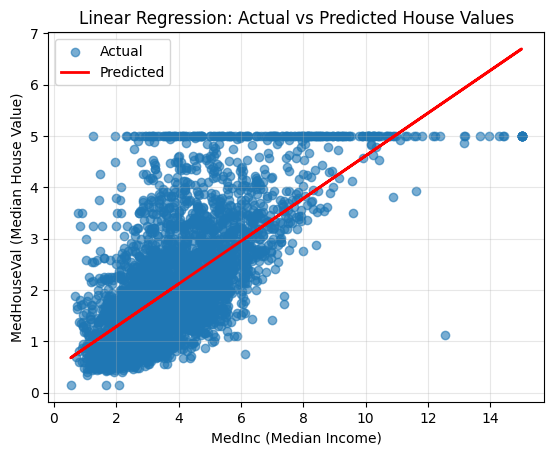

In [15]:
# Visualization: Plot actual vs predicted values
# Visualize how well the model's predictions match the actual test data

import matplotlib.pyplot as plt

# Scatter plot of actual test data points (blue dots)
# X-axis: MedInc (median income), Y-axis: MedHouseVal (actual median house values)
plt.scatter(X_test, y_test, label="Actual", alpha=0.6)

# Line plot of model predictions (red line)
# Shows the linear regression line fitted to the test data
plt.plot(X_test, pred, color="red", label="Predicted", linewidth=2)

# Add labels and legend
plt.xlabel("MedInc (Median Income)")
plt.ylabel("MedHouseVal (Median House Value)")
plt.title("Linear Regression: Actual vs Predicted House Values")
plt.legend()
plt.grid(True, alpha=0.3)

# Display the plot
plt.show()

In [16]:
# STEP 5 — From Scratch Model (Simple Linear Regression)
# Implement linear regression from scratch using gradient descent
# This demonstrates how linear regression works under the hood

import numpy as np

# Convert pandas DataFrames/Series to numpy arrays for easier computation
X_np = X.values.flatten()  # Flatten to 1D array: MedInc values
y_np = y.values            # Convert to numpy array: MedHouseVal values

# Initialize model parameters
# theta0: intercept (bias term)
# theta1: slope (coefficient for MedInc)
theta0 = 0
theta1 = 0

# Learning rate: controls the step size in gradient descent
lr = 0.01

# Number of training samples
n = len(X_np)

# Gradient Descent: Iteratively update parameters to minimize the cost function
# The cost function is Mean Squared Error (MSE)
for i in range(1000):
    # Make predictions using current parameters: y = theta0 + theta1 * X
    y_pred = theta0 + theta1 * X_np
    
    # Calculate gradients (derivatives of MSE with respect to theta0 and theta1)
    # d0: gradient for intercept (theta0)
    d0 = (2/n) * sum(y_pred - y_np)
    
    # d1: gradient for slope (theta1)
    d1 = (2/n) * sum((y_pred - y_np) * X_np)
    
    # Update parameters using gradient descent
    # Move in the opposite direction of the gradient to minimize cost
    theta0 -= lr * d0
    theta1 -= lr * d1

# Display the learned parameters
# theta0: intercept, theta1: slope coefficient
theta0, theta1

(np.float64(0.4424885379162605), np.float64(0.4196981412988478))

In [17]:
# ==============================
# API DATA SOURCE (Toronto Open Data)
# ==============================

import requests
import pandas as pd

url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_list"

response = requests.get(url)

print("Status code:", response.status_code)

data = response.json()

df_api = pd.DataFrame(data["result"], columns=["name"])
df_api.head()

Status code: 200


,name
0,10-year-cycling-network-plan-on-street-2016
1,10-year-cycling-network-plan-trails-2016
2,2013-street-needs-assessment-results
3,2018-street-needs-assessment-results
4,2021-street-needs-assessment-results


In [18]:
df = pd.read_csv("../data/raw/california.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
# Simple cleaning
df_clean = df.dropna()          # remove missing values
df_clean = df_clean.reset_index(drop=True)

# Save to processed folder
df_clean.to_csv("../data/processed/california_clean.csv", index=False)

df_clean.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
